### Obtención de estadísticas descriptivas

#### 1. Carga los datos usando tu lector de csv o con pandas. Es recomendable hacerlo con pandas

In [60]:

import pandas as pd

data = pd.read_csv("covid19_tweets.csv")
data.head(n = 4)



,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False


#### 2.Verifica la cantidad de datos que tienes, las variables que contiene cada vector de datos e identifica el tipo de variables.

In [64]:
#cantidad de objetos
print("Cantidad de datos: ")
print(len(data.index)*(len(data.columns)))

print("\nTipo de variables: ")
# tipo de variables
print(data.dtypes)

Cantidad de datos: 
967668

Tipo de variables: 
user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
is_retweet            bool
dtype: object


#### 3. Analiza las variables para saber qué representa cada una y en qué rangos se encuentran. Si la descripción del problema no te lo indica, utiliza el máximo y el mínimo para encontrarlo.

Todos los datos de este dataframe son relacionados a tweets. Tres de ellos son sujetos a ser analizados con números, a saber, user_name(nombre del usuario que tuiteó), user_friends(el número de personas que seguida y user_favourites (número de tweets a los que el usuario ha dado me gusta). Los demás significan:

user_location: lugar dónde se escribió el tuit

user_description: la biografía en el perfil del usuario

user_verified: indica si el usuario es una figura conocida

date: fecha en la que se publicó el tuit

text: el contenido del tuit

user_created: indica cuando el usuario creó su cuenta

hashtags: la lista de hashtags utilizados

source: de qué dispositivo se envió el tuit

is_retweet: indica si el tuit es original o un retweet

Para las tres variables sujetas a ser analizadas, con la function df.describe() se obtuvo el número total de datos, la media, la desviación estandar, su valor máximo y mínimo. Se utilizó la función df.median() para obtener la mediana de estos datos. Asímismo, se hizo una gráfica para poder visualizar estos datos más facilmente:

In [65]:
pd.set_option('float_format', '{:f}'.format)
print(data.describe())
data_int = data.select_dtypes(include = ['int'])
print("")
print("Mediana: ")
print(data_int.median())

       user_followers  user_friends  user_favourites
count    74436.000000  74436.000000     74436.000000
mean    105951.312913   2154.721170     15297.472030
std     822289.985493   9365.587474     46689.714291
min          0.000000      0.000000         0.000000
25%        166.000000    153.000000       220.000000
50%        960.000000    552.000000      1927.000000
75%       5148.000000   1780.250000     10148.000000
max   13892841.000000 497363.000000   2047197.000000

Mediana: 
user_followers     960.000000
user_friends       552.000000
user_favourites   1927.000000
dtype: float64


       user_followers  user_friends  user_favourites
0                 624           950            18775
1                2253          1677               24
2                9275          9525             7254
3                 197           987             1488
4              101009           168              101
...               ...           ...              ...
74431              85           586             1902
74432            4289          1066            53569
74433            1413           102               16
74434            2554          1733           129104
74435             310          1748            60133

[74436 rows x 3 columns]


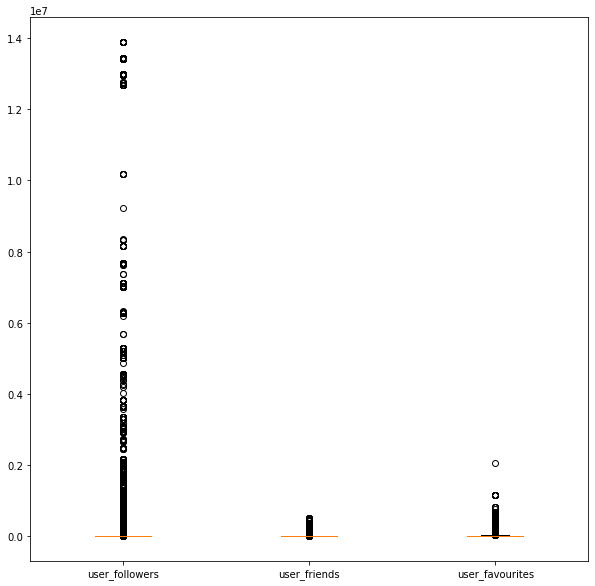

In [66]:
import matplotlib.pyplot as plt



fig = plt.figure(figsize =(10, 10))

print(data_int)
plt.boxplot(data_int, labels = ["user_followers", "user_friends", "user_favourites"])
plt.show()

#### 4. Basándose en la media, mediana y desviación estándar de cada variable, ¿Qué conclusiones puedes entregar de los datos?

El caso de user_followers es el más notorio respecto a la dispersión en sus datos. Esto se puede notar a primera vista en el gráfico.  También se puede notar por su valor de la desviación estandar, que es la mayor entre todas las variables. Si se compara, asimismo, su mediana (960) y su media (105951.312913) también se puede observar esta disparidad. Esto puede haber sido ocasionado por unos cuantos casos en los que los tweets son publicados por cuentas con gran cantidad de seguidores. Por ejemplo, la cuenta con más seguidores de este data frame es CGTN, una cuenta de noticias china, que tiene más de 13 millones de seguidores, mientras que, al menos la mitad, como indica la mediana, no rebasa los 960 seguidores.

Respecto a user_friends, ésta tiene la menor desviación estandar entre todas las variables. Esto puede deberse a que, a diferencia de user_followers, es lógico que la gran mayoría de las usuarios no siga una cantidad tan masiva de cuentas. En user_friends el máximo tiene un valor de 497363, que es de un usuario llamado @tim_fargo, y en user_followers el máximo es de más de 13 millones.

Por último, user_favourites se encuentra en el medio en lo que respecta a su desviación estandar, que tiene un valor de 46689.71. La gran mayooría de usuarios, según indica la mediana, tien alrededor de 1927 tweets en favoritos, mientras que hay una menor cantidad de usarios que, tal vez debido a que utilizan más la aplicación, hacen que la media de user_favourites sea de 15297.47.